# IMPORTING IMPORTANT LIBRARIES

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# IMPORTING THE CSV DATASET AS PANDAS DATAFRAME

In [81]:
df=pd.read_csv('StudentsPerformance.csv')

In [82]:
#top 5 records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [83]:
#shape of dataset
df.shape

(1000, 8)

### CHECKING MISSING VALUES


In [84]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

NO MISSING VALUES FOUND

### CHECKING DUPLICATES

In [85]:
df.duplicated().sum()

0

NO DUPLICATE VALUE FOUND

### CHECKING DATATYPES


In [86]:
#checking null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### CHECKING NUMBER OF UNIQUE VALUES OF EACH COLUMN

In [87]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### CHECKING STATISTICS OF DATASET

In [88]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


 -FROM ABOVE DESCRIPTION OF NUMERICAL DATA, ALL MEANS ARE VERY CLOSE TO EACH OTHER RANGING BETWEEN 66 TO 69;
 
 -ALL STANDARDS DEVIATIONS ARE ALSO CLOSE RANGING BETWEEN 14.6 TO 15.19;
 
 -THERE IS A MINIMUM SCORE 0 FOR MATHS, FOR WRITING 10 AND FOR READING IT'S 17

### EXPLORING DATA

In [89]:
print("Categories in 'gender' variable:   ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:   ",end=" " )
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:   ",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:   ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:   ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:    ['female' 'male']
Categories in 'race/ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:    ['none' 'completed']


In [90]:
#defining numerical and categorical features
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O']

print('WE HAVE {} NUMERICAL FEATURES : {}'.format(len(num_feature),num_feature))
print('WE HAVE {} CATEGORICAL FEATURE : {}'.format(len(cat_feature),cat_feature))

WE HAVE 3 NUMERICAL FEATURES : ['math score', 'reading score', 'writing score']
WE HAVE 5 CATEGORICAL FEATURE : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### CREATING TWO NEW COLUMNS: TOTAL SCORE AND AVERAGE

In [91]:
df['total score']=df['math score'] + df['reading score'] + df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [92]:
#checking no of students got full marks in each indvidual sectiom
math_full=df[df['math score']==100]['math score'].count()
reading_full=df[df['reading score']==100]['reading score'].count()
writing_full=df[df['writing score']==100]['writing score'].count()

print(f"No. of students withs full marks in maths: {math_full}")
print(f"No. of students withs full marks in reading: {reading_full}")
print(f"No. of students withs full marks in writing: {writing_full}")

No. of students withs full marks in maths: 7
No. of students withs full marks in reading: 17
No. of students withs full marks in writing: 14


In [93]:
# checking no. of students less than 20 marks
math_less=df[df['math score']<=20]['math score'].count()
reading_less=df[df['reading score']<=20]['reading score'].count()
writing_less=df[df['writing score']<=20]['writing score'].count()

print(f"No. of students withs less marks in maths: {math_less}")
print(f"No. of students withs less marks in reading: {reading_less}")
print(f"No. of students withs less marks in writing: {writing_less}")

No. of students withs less marks in maths: 4
No. of students withs less marks in reading: 1
No. of students withs less marks in writing: 3


FROM ABOVE VALUES STUDENTS HAVE PERFORMED WORST ON MATHS FOLLOWED BY WRITING AND BEST PERFORMANCE IS IN READING SECTION.

### VISUALIZATION

<Axes: xlabel='average', ylabel='Count'>

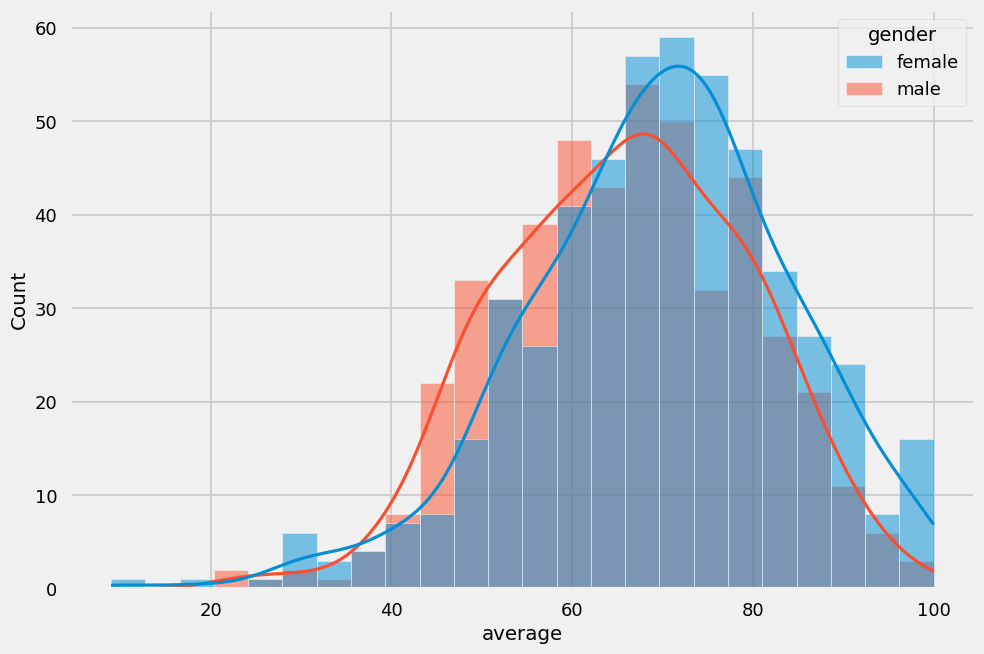

In [94]:

sns.histplot(data=df,x='average',kde=True, hue='gender')

FEMALE STUDENTS HAVE PERFORMED WELL W.R.T. MALE STUDENTS.

<Axes: xlabel='total score', ylabel='Count'>

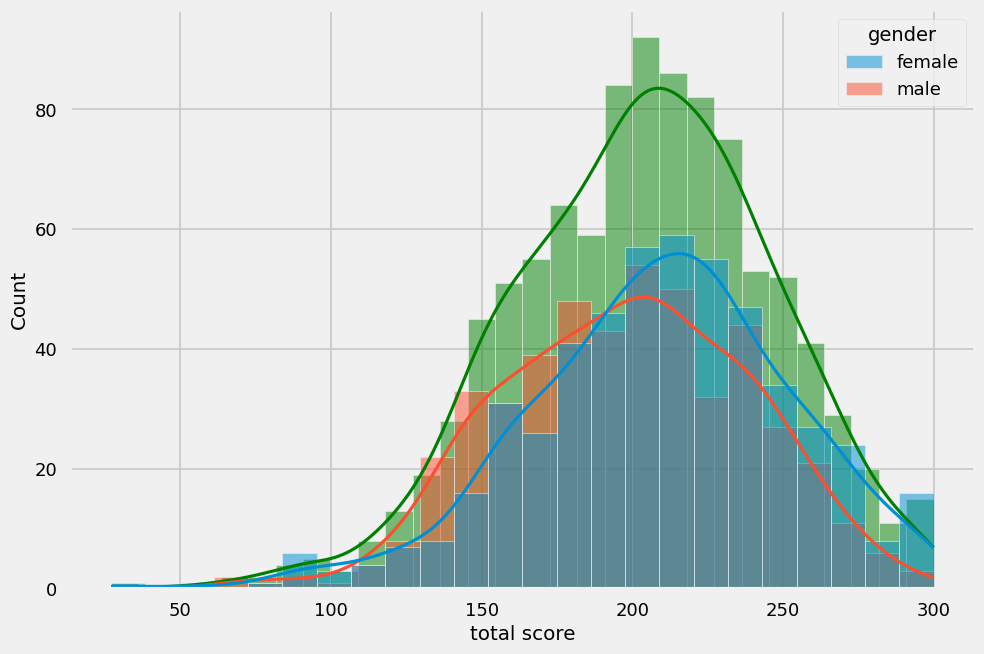

In [95]:
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
sns.histplot(data=df,x='total score',kde=True,hue='gender')

FEMALE STUDENTS TEND TO PERFORM WELL THEN MALE STUDENTS.

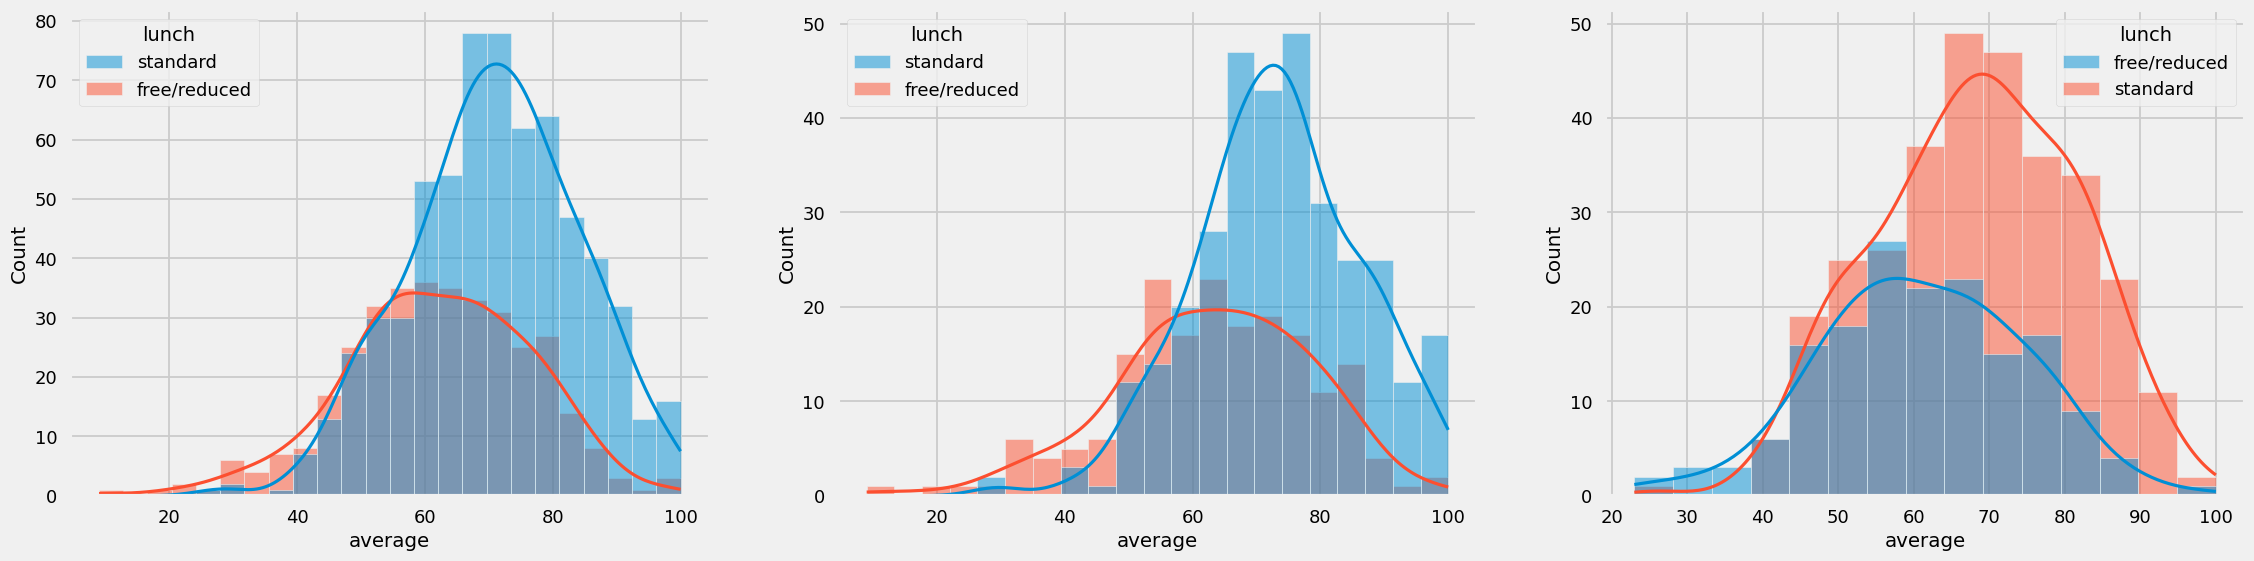

In [96]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

-STANDARD LUNCH HELPS STUDENTS TO PERFORM BETTER IN EXAMS.

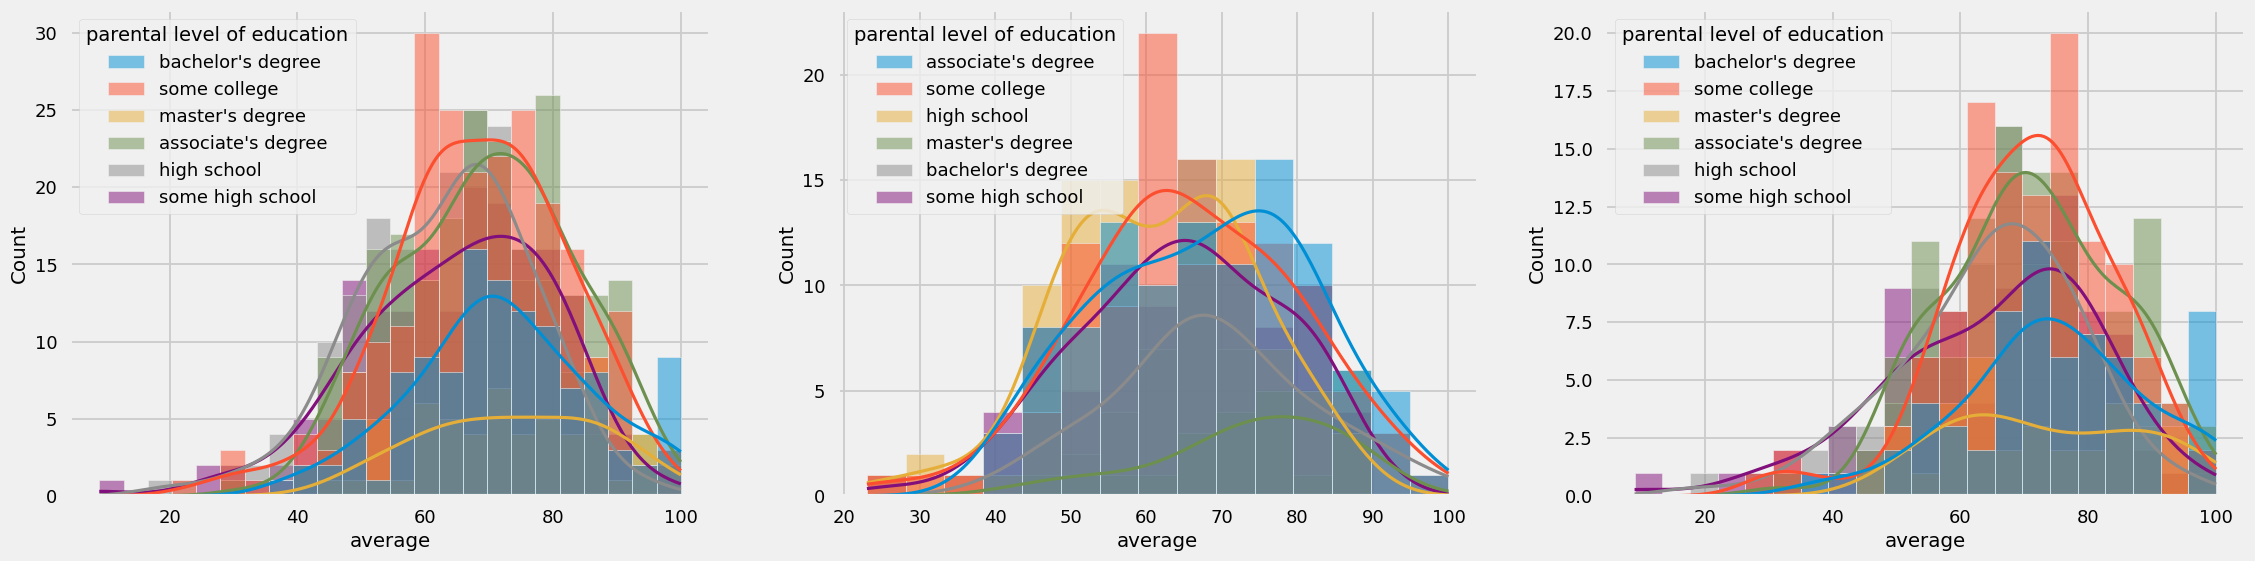

In [97]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

- WE CAN SEE THAT IN GENERAL PARENT'S EDUCATION DOES'NT GIVE ANY WEIGHTAGE TO STUDENTS TO PERFORM WELL IN EXAMS. 

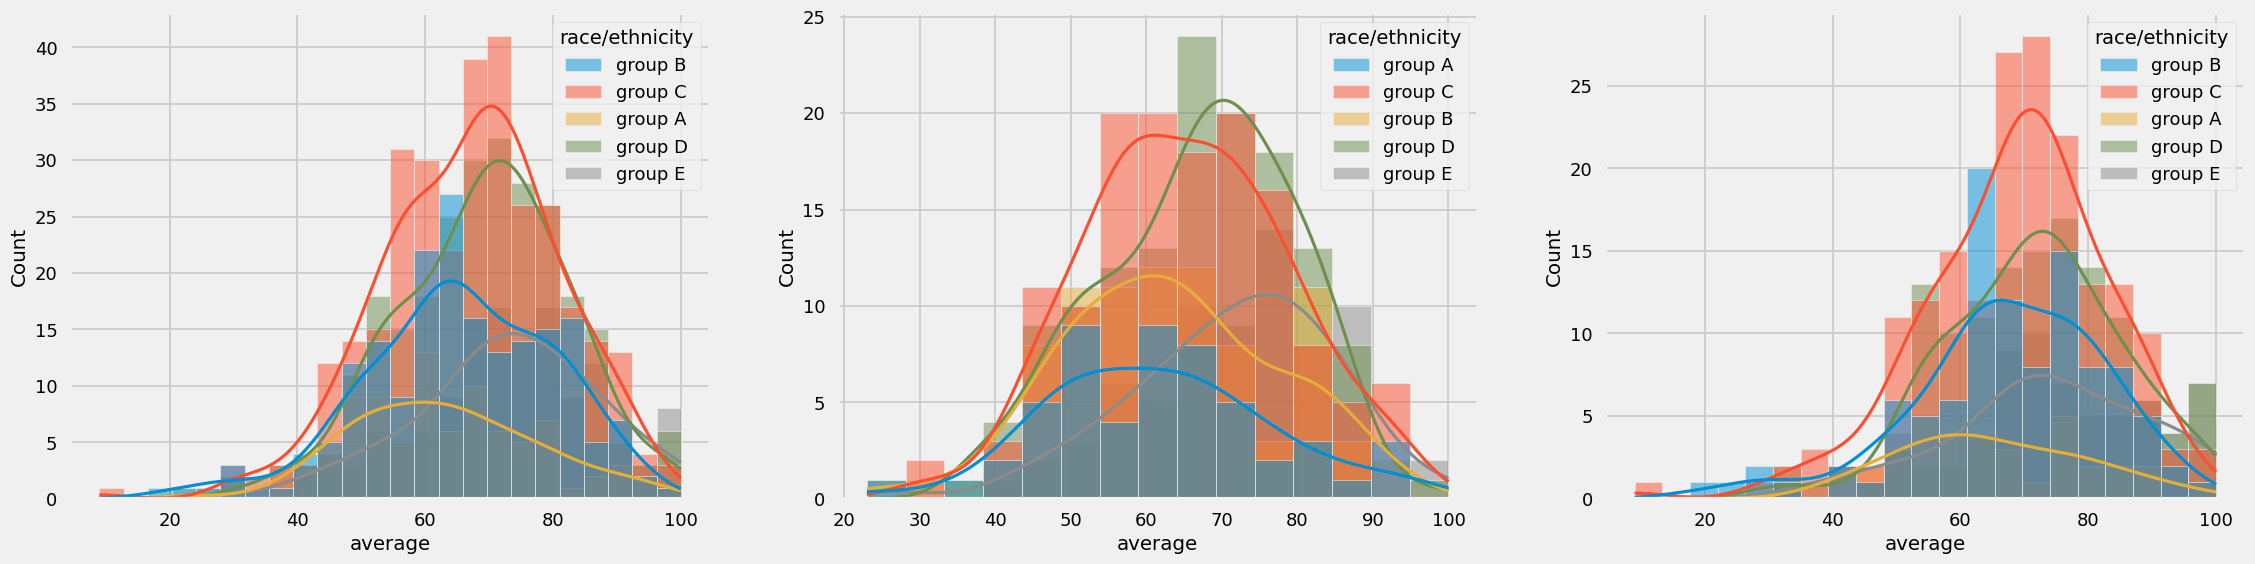

In [98]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue="race/ethnicity")
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.show()

GROUP A AND GROUP B STUDENTS TEND TO PERFORM POORLY IN EXAMS IRRESPECTIVE OF THEIR GENDER.

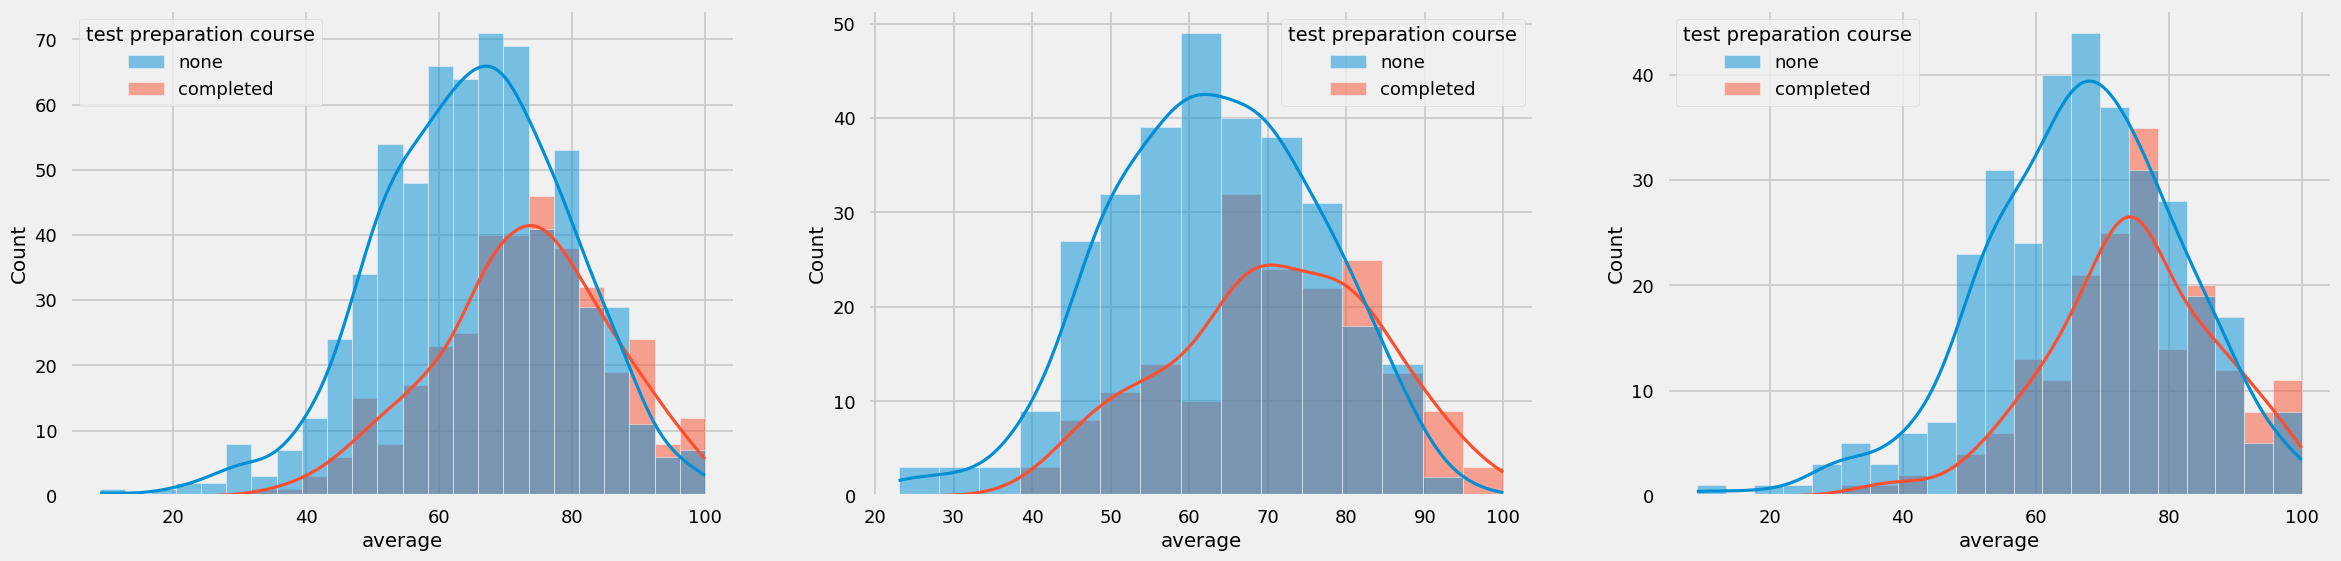

In [99]:
plt.subplots(1,3,figsize=(26,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='test preparation course')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='test preparation course')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='test preparation course')
plt.show()

 STUDENTS WHO HAVE COMPLETED THE COURSE TEND TO PERFORM BETTER IN EXAMS. 

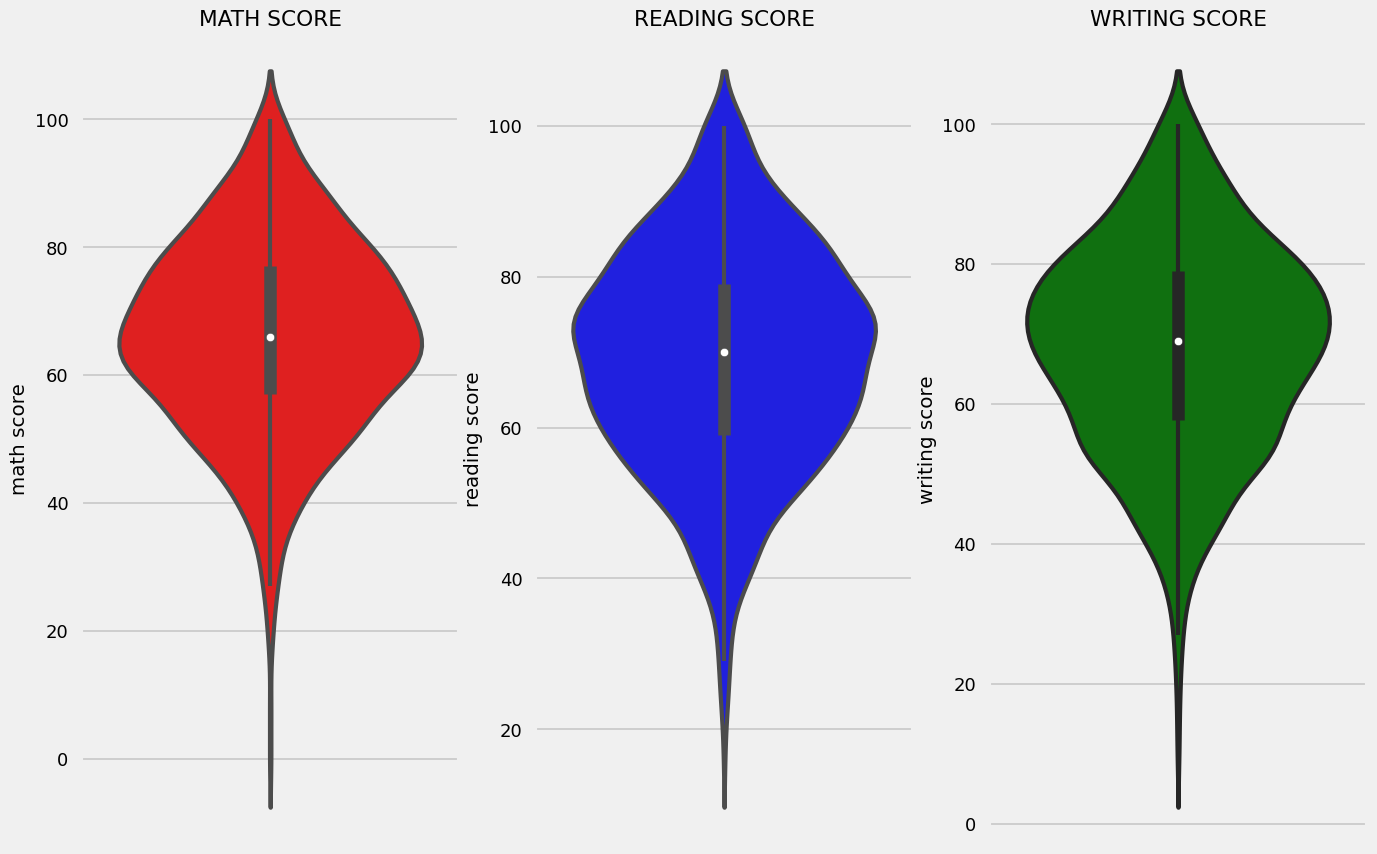

In [100]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title('MATH SCORE')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(y='reading score',data=df,color='blue',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(data=df,y='writing score',color='green',linewidth=3)
plt.show()

FROM ABOVE WE CAN CLEARLY SEE THAT MOST OF THE STUDENTS SCORE IN BETWEEN 60 TO 80 IN MATHS,READING AND WRITING.

### MULTIVARIATE ANALYSIS

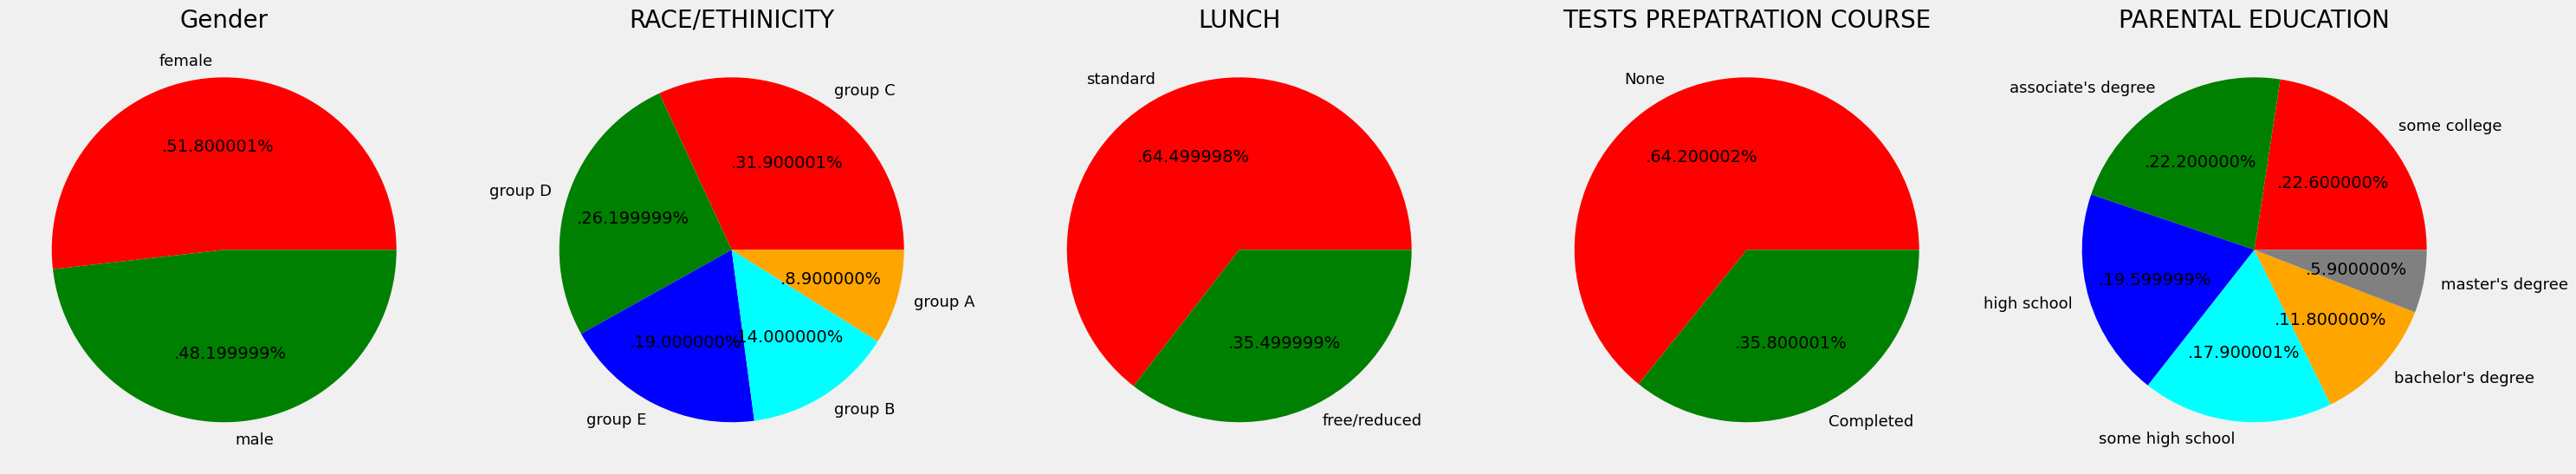

In [101]:
plt.rcParams['figure.figsize']=(30, 7)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='female', 'male'
color=['red','green']

plt.pie(size,colors=color, labels= labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race/ethnicity'].value_counts()
labels='group C' , 'group D', 'group E', 'group B','group A'
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('RACE/ETHINICITY',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='standard', 'free/reduced'
color=['red','green']

plt.pie(size, colors=color,labels=labels,autopct='.%2f%%')
plt.title('LUNCH',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['test preparation course'].value_counts()
labels='None','Completed'
color=['red','green']

plt.pie(size, colors=color,labels=labels,autopct='.%2f%%')
plt.title('TESTS PREPATRATION COURSE',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['parental level of education'].value_counts()
labels= "some college","associate's degree","high school","some high school" , "bachelor's degree", "master's degree"
color=['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels,autopct='.%2f%%')
plt.title('PARENTAL EDUCATION',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()






NUMBER OF FEMALE STUDENTS ARE SLIGHTLY MORE THAN MALE STUDENTS.

NUMBER OF STUDENTS ARE GREATER IN GROUP C.

NUMBER OF STUDENTS WHO HAVE STANDARD LUNCH ARE GREATER.

NUMBER OF STUDENTS WHO HAVE NOT ENROLLED IN ANY TEST PREPARATION ARE GREATER.

NUMBER OF STUDENTS WHOSE PARENTS HAVE SOME COLLEGE QUALIFICATION ARE MOST.

### FEATURE WISE VISUALIZATION 

#### GENDER COLUMN
##### -HOW IS THE DISTRIBUTION OF GENDER? (UNIVARIRATE ANALYSIS)

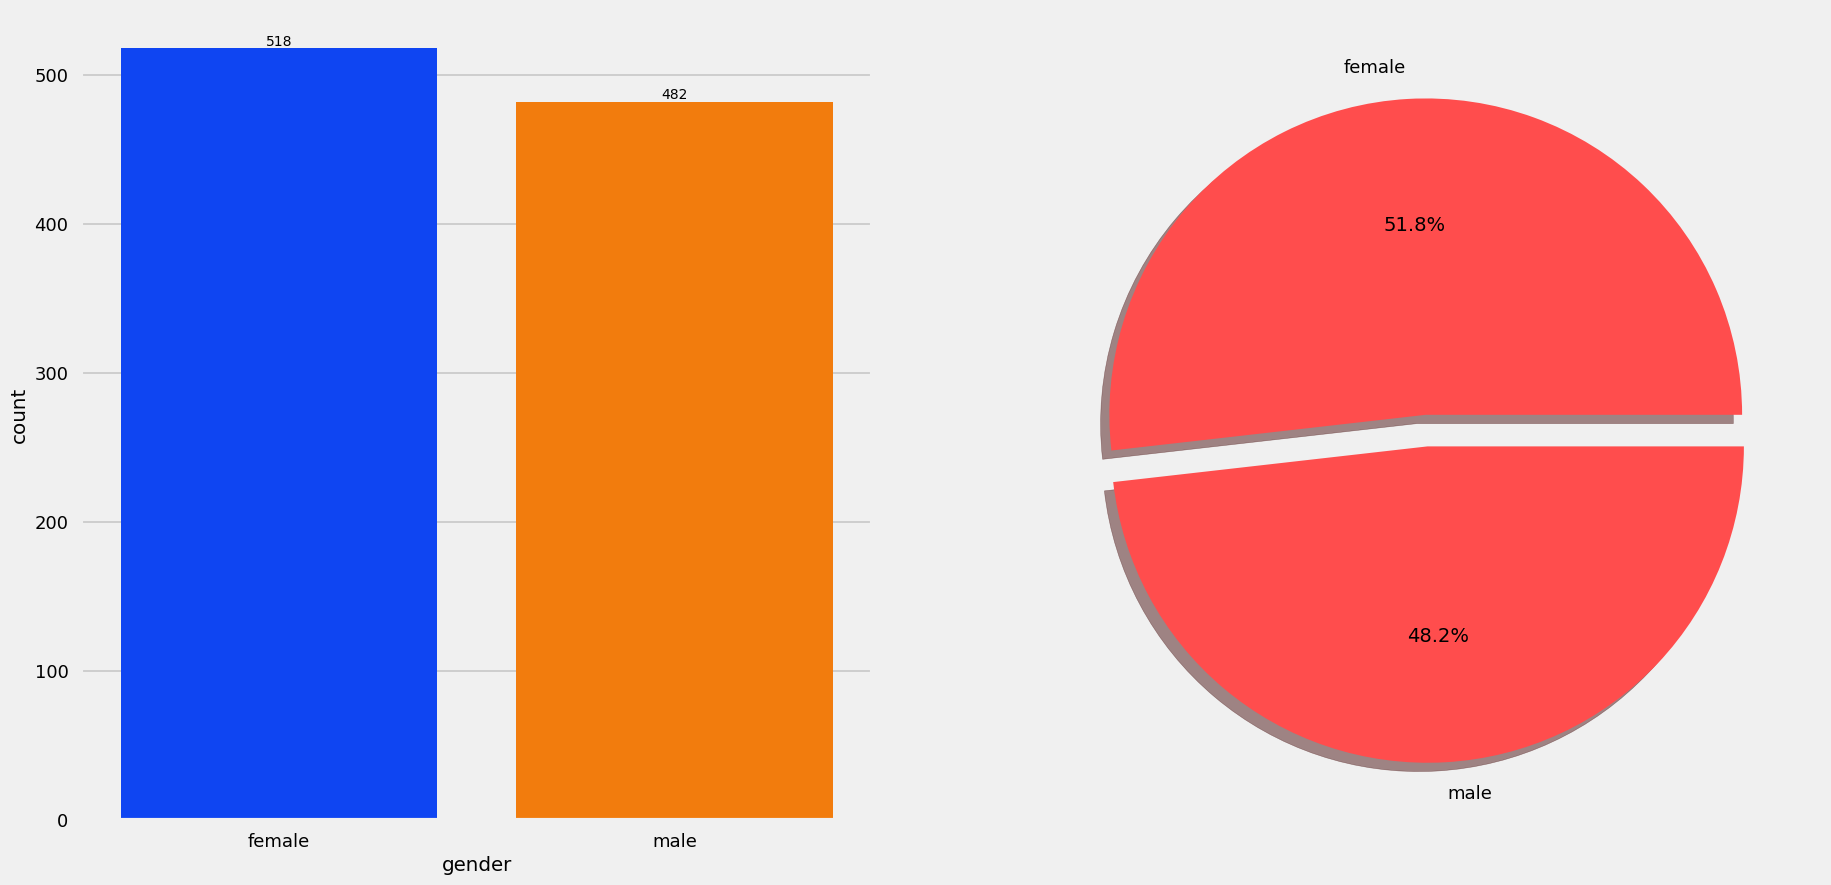

In [102]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.90)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=df['gender'].value_counts(),labels=['female','male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d'])
plt.show()

GENDER HAS BALANCED DATA WITH 518 FEMALE AND 482 MALE STUDENTS.

#### -IS GENDER HAS ANY IMPACT ON STUDENTS'S PERFORMANCE (BIVARIATE ANALYSIS)

In [103]:
gender_grp=df.groupby('gender').mean(numeric_only=True)
gender_grp

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


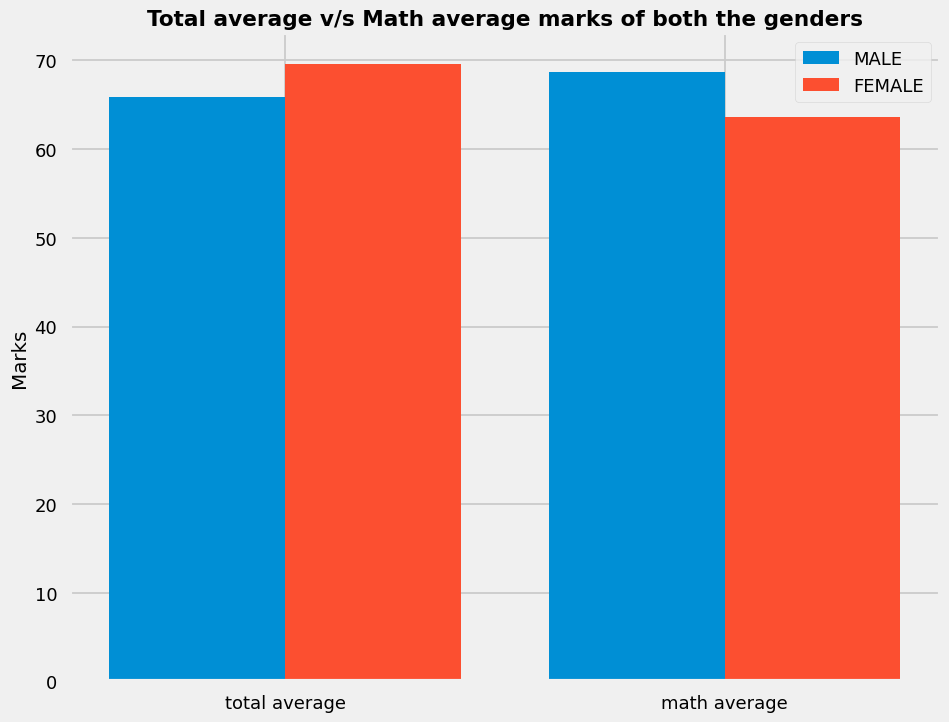

In [104]:
plt.figure(figsize=(10,8))
X=['total average','math average']
female_scores=[gender_grp['average'][0],gender_grp['math score'][0]]
male_scores=[gender_grp['average'][1],gender_grp['math score'][1]]
X_axis=np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='MALE')
plt.bar(X_axis + 0.2,female_scores, 0.4, label='FEMALE')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


ON AVERAGE FEMALE HAVE BETTER OVERALL SCORE THAN MEN.

MALE STUDENTS HAVE SCORED HIGH IN MATHS.

#### RACE/ETHNICITY COLUMN
##### HOW IS GROUP WISE DISTRIBUTION? (UNIVARIATE ANALYSIS)

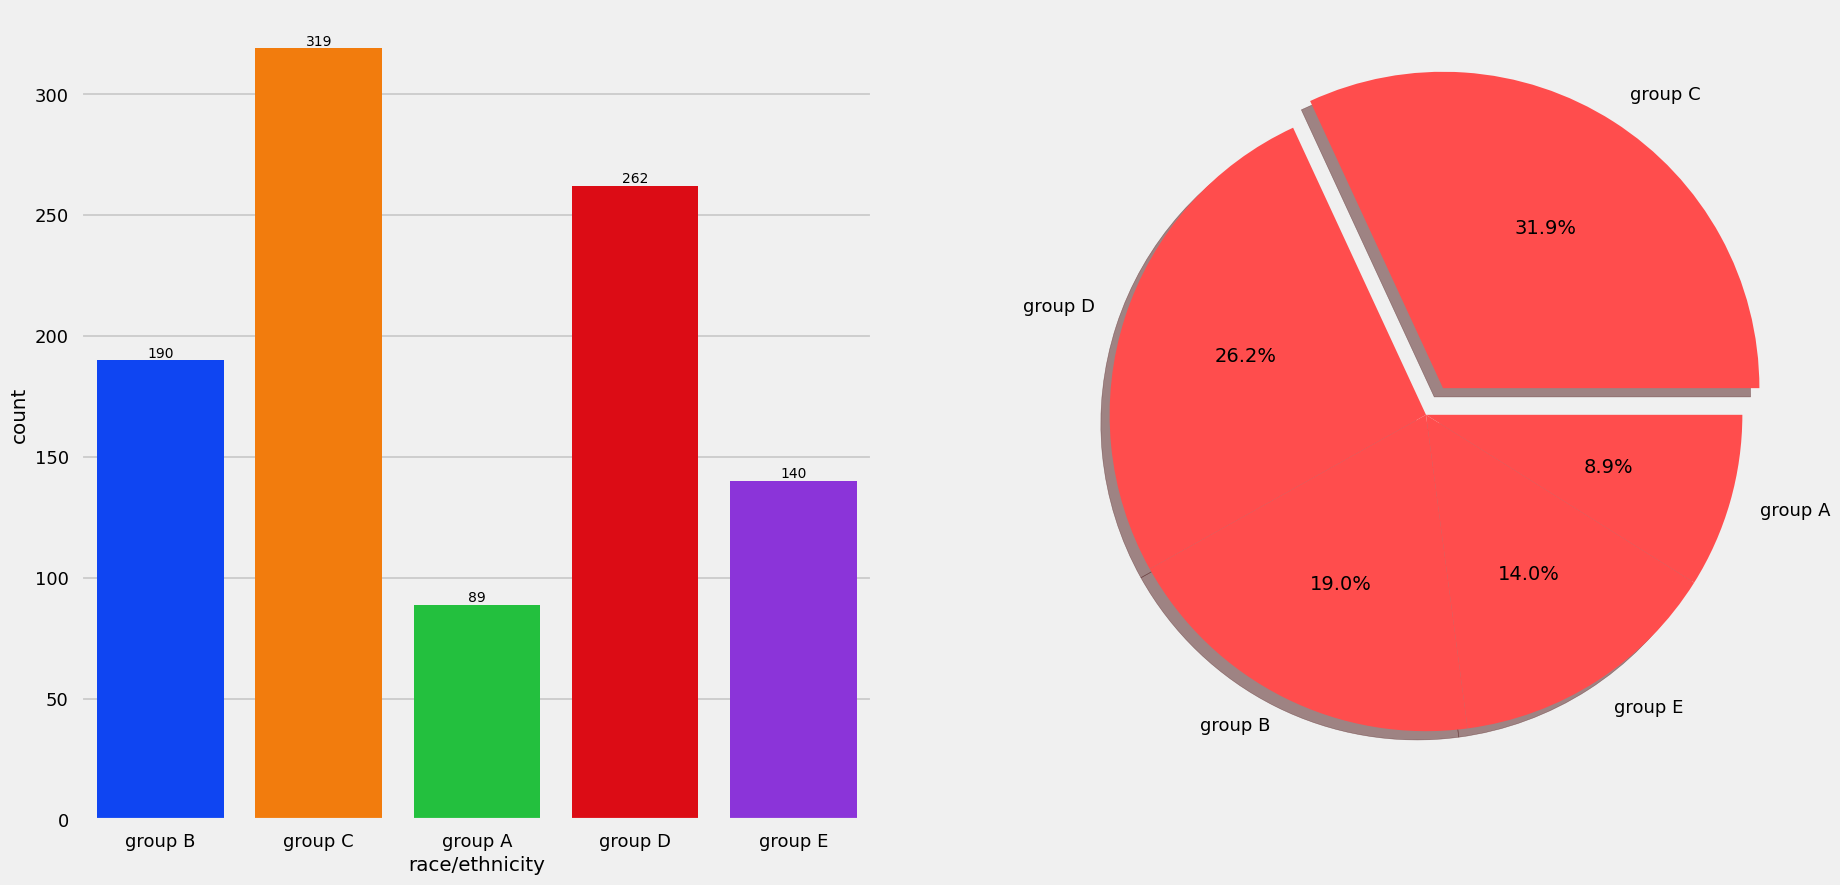

In [105]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.90)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d'])
plt.show()

MOST OF THE STUDENTS BELONGS TO GROUP C AND LEAST NUMBER OF STUDENTS ARE IN GROUP A.

#### -IS race/ethnicity HAS ANY IMPACT ON STUDENTS'S PERFORMANCE (BIVARIATE ANALYSIS)

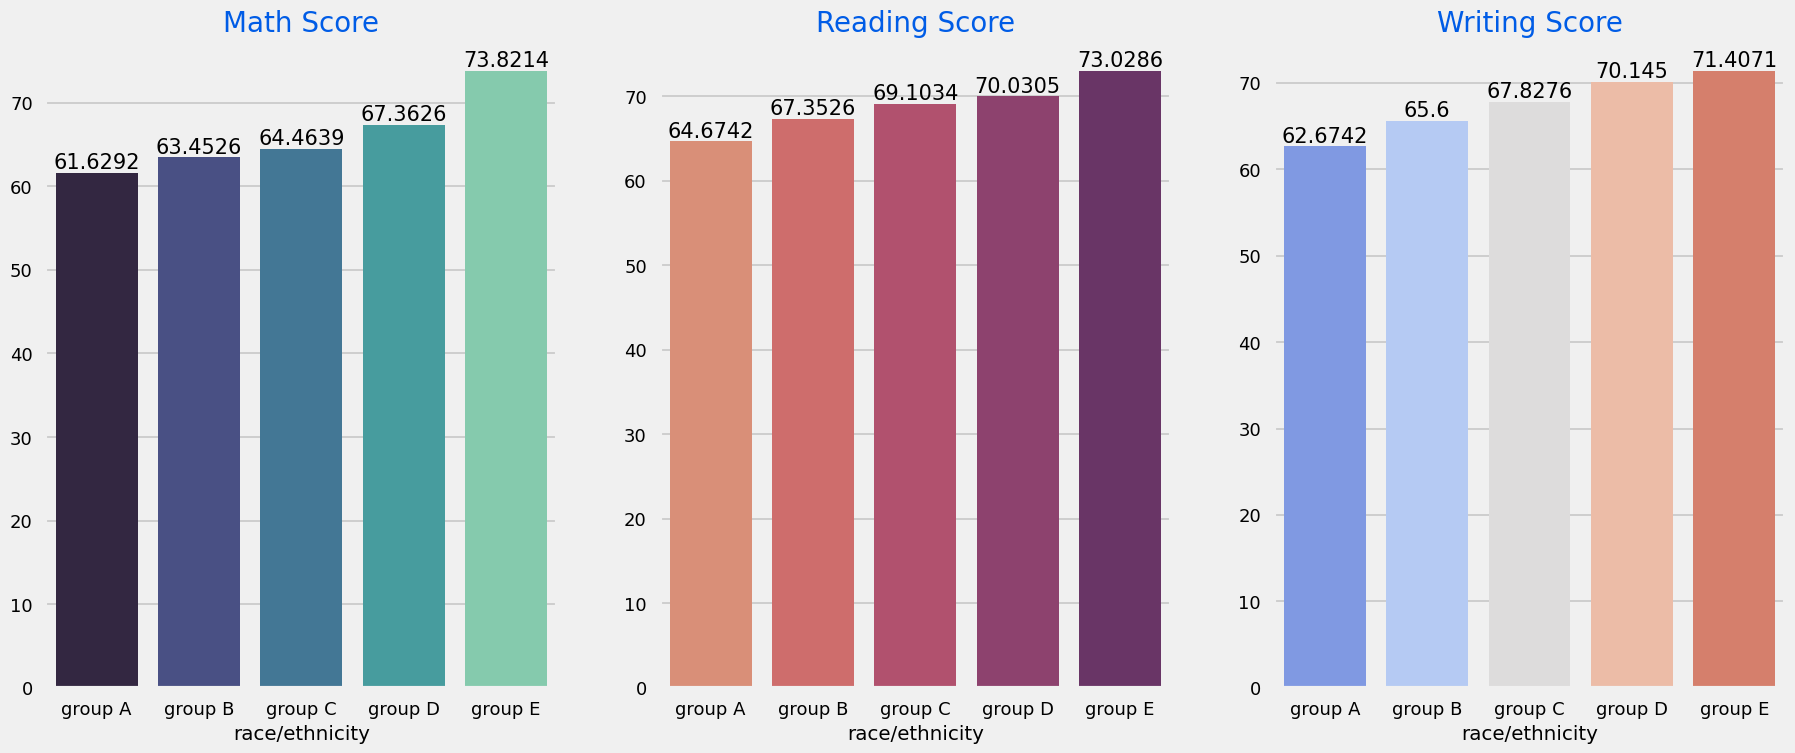

In [106]:
race_grp=df.groupby('race/ethnicity')

f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=race_grp['math score'].mean().index,y=race_grp['math score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math Score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
sns.barplot(x=race_grp['reading score'].mean().index,y=race_grp['reading score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading Score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
    
sns.barplot(x=race_grp['writing score'].mean().index,y=race_grp['writing score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('Writing Score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

GROUP E STUDENTS HAVE SCORED HIGHEST MARKS, GROUP A HAVE THE LOWEST MARKS.

#### PARENTAL LEVEL OF EDUCATION
##### WHAT IS THE EDUCATIONAL BACKGROUND OF STUDENT'S PARENTS (UNIVARIATE ANALYSIS)

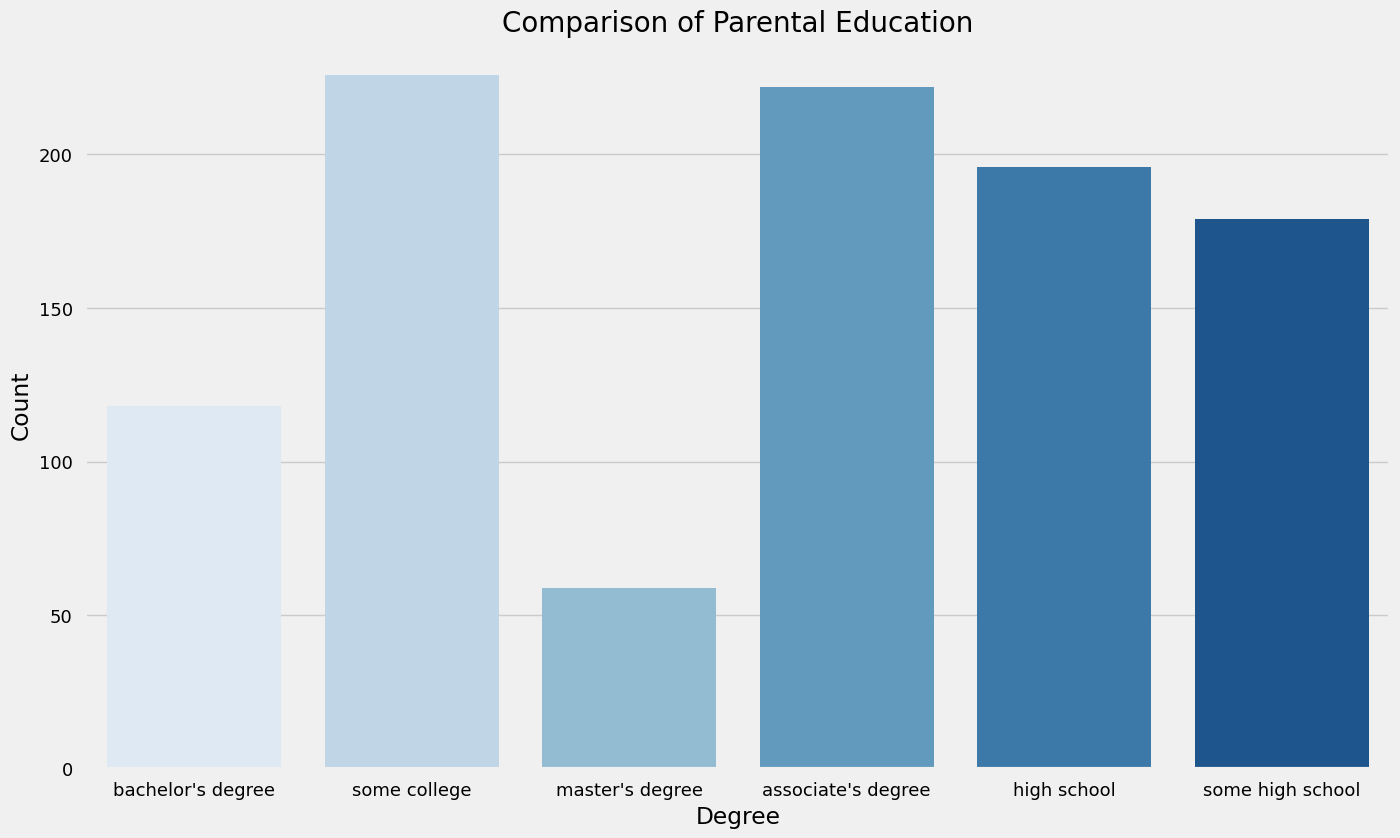

In [107]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(data=df,x='parental level of education',palette='Blues')
plt.title('Comparison of Parental Education',fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

LARGEST NUMBER OF PARENTS ARE FROM SOME COLLEGE

#### IS PARENTAL EDUCATION HAS ANY IMPACT ON STUDENT'S PERFORMANCE (BIVARIATE ANALYSIS)

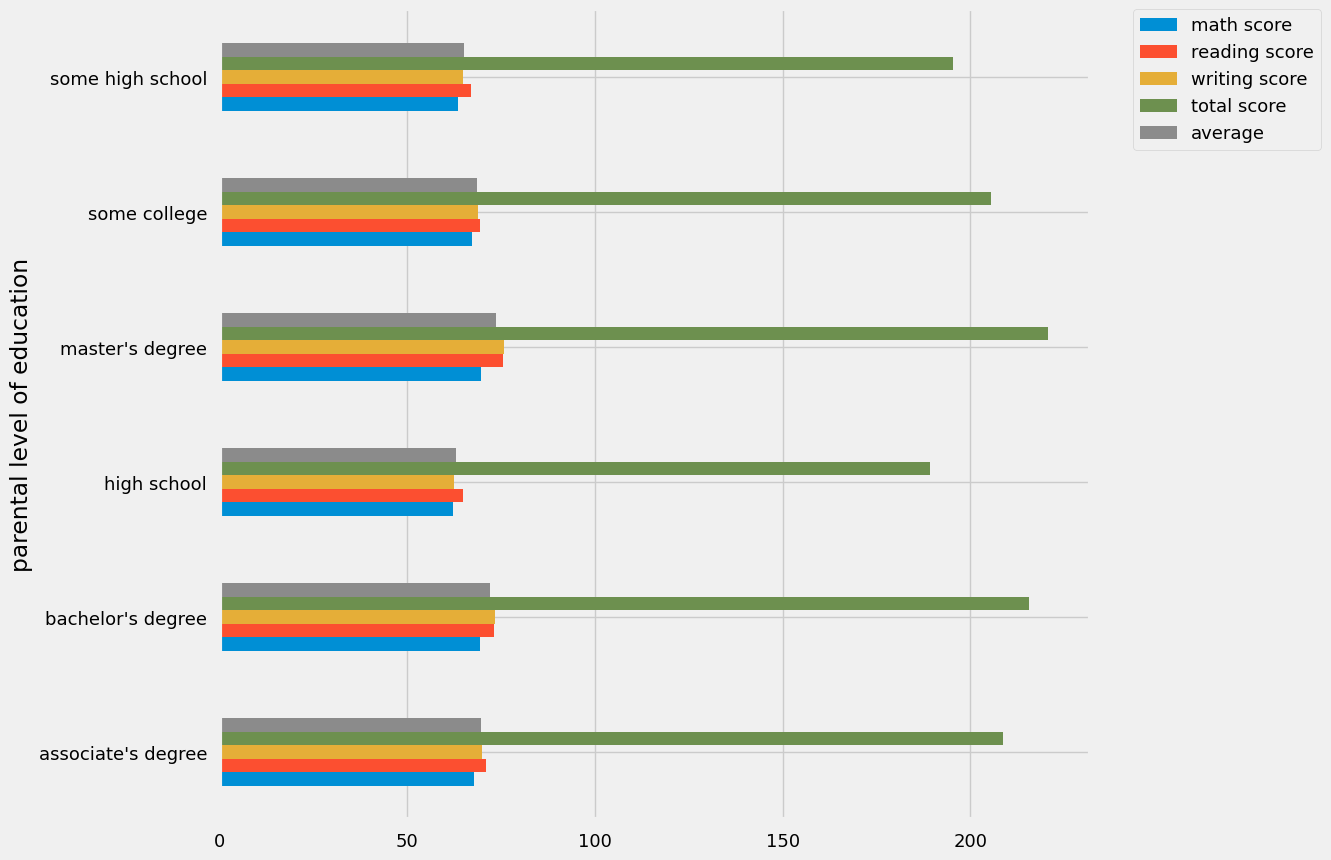

In [108]:
df.groupby('parental level of education').agg('mean',numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

THE SCORE OF STUDENT WHOSE PARENTS POSSES MASTER LEVEL OF EDUCATION IS HIGHEST.

#### LUNCH COLUMN
##### WHICH TYPE OF LUNCH IS MOST COMMON AMONG STUDENTS? (UNIVARIATE ANALYSIS)

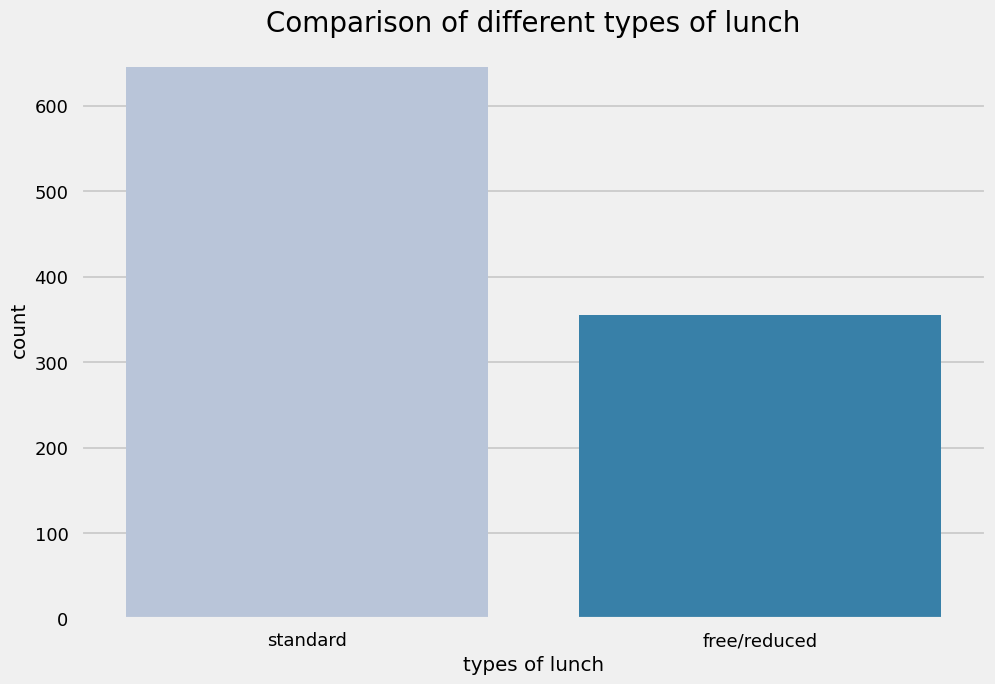

In [109]:
plt.rcParams['figure.figsize']=(15, 9)
plt.style.use('seaborn-talk')
sns.countplot(data=df,x='lunch', palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30,fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

MOST OF THE STUDENRS ARE HAVING STANDARD LUNCH.

##### IS LUNCH TYPE INTAKE HAS ANY IMPACT ON STUDENTS'S PERFORMANCE? (BIVARIATE ANALYSIS)

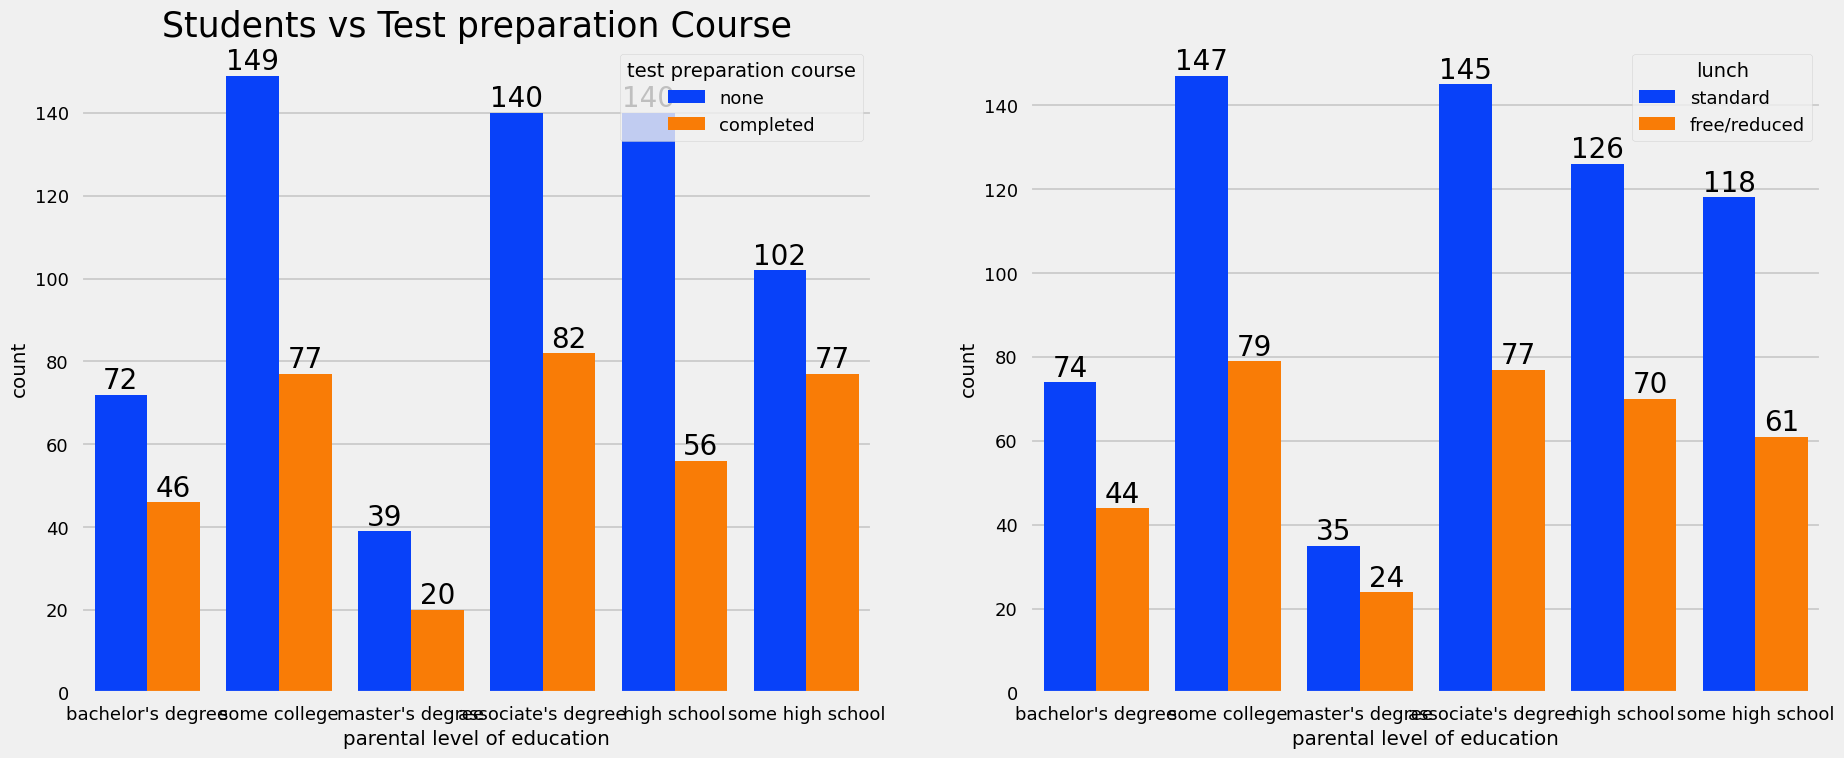

In [110]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette='bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs Test preparation Course', color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    

sns.countplot(x=df['parental level of education'],data=df,palette='bright',hue='lunch',saturation=0.95,ax=ax[1])

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

### CHECKING OUTLIERS

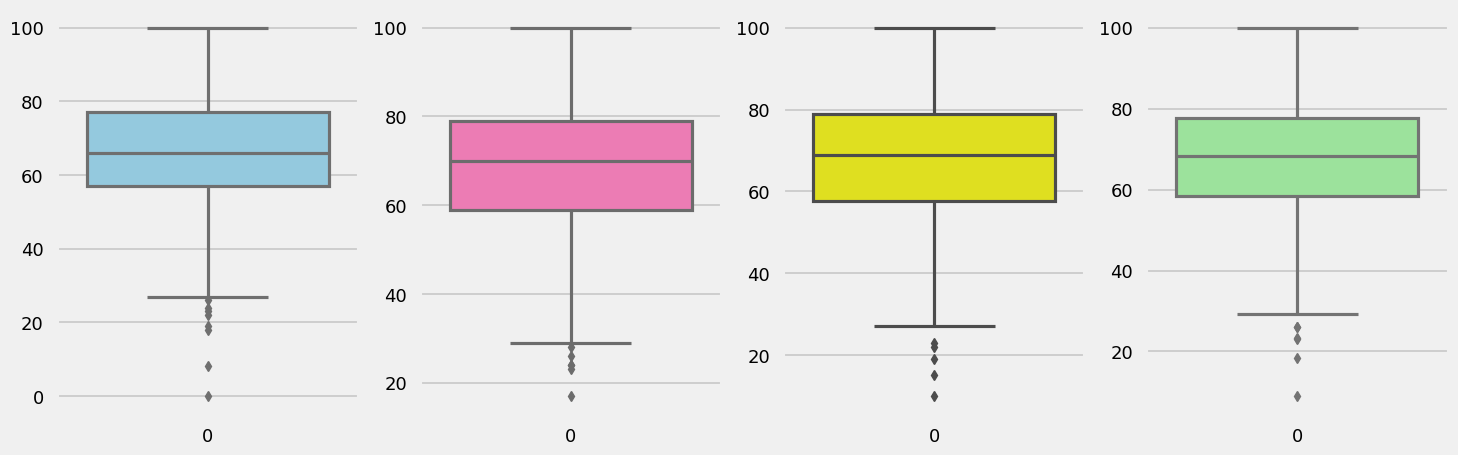

In [111]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### MULTIVARIATE ANALYSIS USING PAIRPLOT

<function matplotlib.pyplot.show(close=None, block=None)>

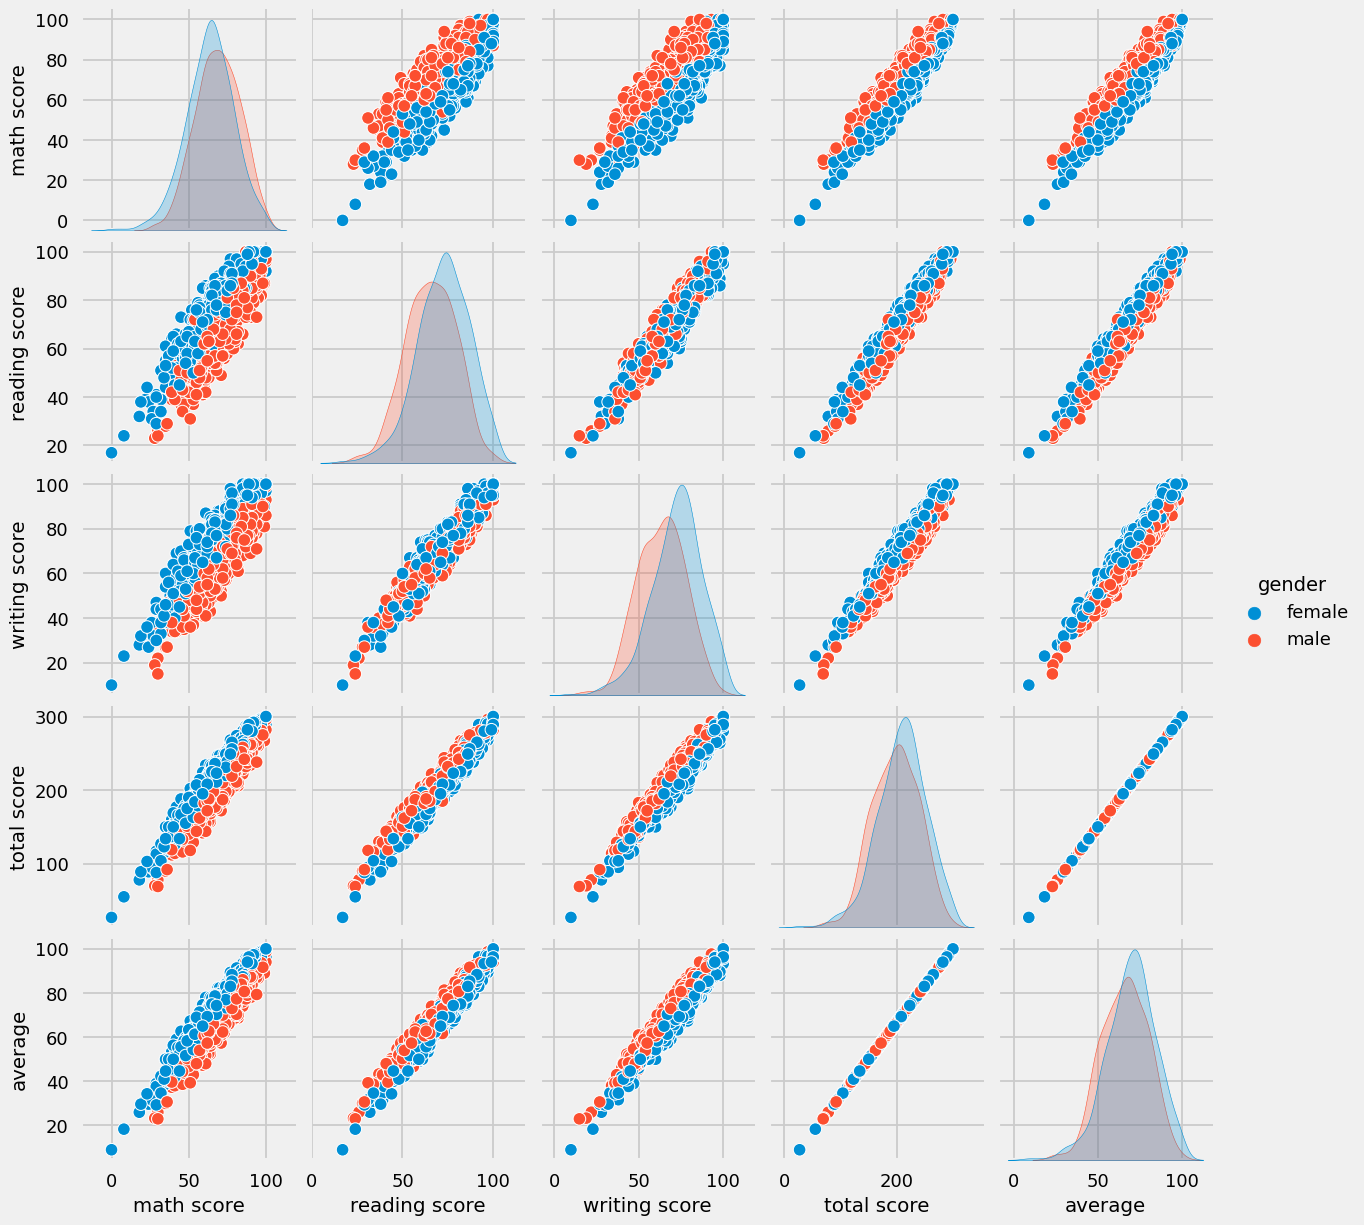

In [112]:
sns.pairplot(df,hue='gender')
plt.show

FROM ABOVE GRAPH WE CAN SEE THAT ALL THE SCORES INCREASES LINEARLY WITH WITH EACH OTHER.